# Imports

In [1]:
from src.sql_helpers import query_df
#from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Connection to SQL server successful!


/home/markus/Desktop/Data Scientist/3. SQL/2. Examinerande_Uppgift/src/sql_helpers.py:19: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


# Task 1 - Amount of products per category
### Place categories in a DataFrame and place all unique Categories in a list

In [2]:
# Production.ProductCategory
cat_query = """
SELECT ProductCategoryID, Name
FROM Production.ProductCategory
"""

cat_df = query_df(cat_query)

productCategoryIDs = cat_df['ProductCategoryID'].unique()
productCategoryIDs.sort()
print(f"Unique Category ID's: {productCategoryIDs}")
cat_df

Unique Category ID's: [1 2 3 4]


,ProductCategoryID,Name
0,4,Accessories
1,1,Bikes
2,3,Clothing
3,2,Components


### Place subcategories in a DataFrame and place all unique Subcategories in a list

In [3]:
# Production.ProductSubcategory
subcat_query = """
SELECT ProductSubcategoryID, ProductCategoryID
FROM Production.ProductSubcategory
"""
subcat_df = query_df(subcat_query)
productSubcategoryIDs = subcat_df['ProductSubcategoryID'].unique()
productSubcategoryIDs.sort()
print(f"Unique Subcategory ID's: {productSubcategoryIDs}")
subcat_df

Unique Subcategory ID's: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]


,ProductSubcategoryID,ProductCategoryID
0,1,1
1,2,1
2,3,1
3,4,2
4,5,2
5,6,2
6,7,2
7,8,2
8,9,2
9,10,2


### Place products in a DataFrame and place all unique productID's in a list

In [4]:
# Production.Product
product_query = """
SELECT ProductID, ProductSubcategoryID
FROM Production.Product
"""

product_df = query_df(product_query)
product_df["ProductSubcategoryID"] = product_df["ProductSubcategoryID"].replace(np.nan, 0.0)

productIDs = product_df['ProductID'].unique()
productIDs.sort()
#print(f"Unique Product ID's: {productIDs}")
product_df

,ProductID,ProductSubcategoryID
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,316,0.0
...,...,...
499,995,5.0
500,996,5.0
501,997,2.0
502,998,2.0


### Check how many subcategories each category has

In [5]:
subcats_in_cat = {}

# Loops over all ProductCategoryID's and adds it as a key along with all ProductSubcategoryID's as a list for value that has that ProductCategoryID
for i in productCategoryIDs:
    temp_df = subcat_df.loc[subcat_df["ProductCategoryID"] == i]
    if i not in subcats_in_cat:
        subcats_in_cat[i] = [_ for _ in temp_df["ProductSubcategoryID"]]

print(subcats_in_cat)


{1: [1, 2, 3], 2: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 3: [18, 19, 20, 21, 22, 23, 24, 25], 4: [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]}


### Check how many products each subcategory has

In [6]:
products_per_subcat = {}

for i in productSubcategoryIDs:
    products_per_subcat[f"{i}"] = len(product_df[product_df["ProductSubcategoryID"] == i])
products_per_subcat["Null"] = product_df["ProductSubcategoryID"].isna().sum()

sorted_orders = dict(sorted(products_per_subcat.items(), key=lambda item: item[1], reverse=True))

print(products_per_subcat)

{'1': 32, '2': 43, '3': 22, '4': 8, '5': 3, '6': 2, '7': 1, '8': 3, '9': 2, '10': 3, '11': 3, '12': 28, '13': 7, '14': 33, '15': 9, '16': 18, '17': 14, '18': 3, '19': 1, '20': 6, '21': 8, '22': 7, '23': 4, '24': 3, '25': 3, '26': 1, '27': 1, '28': 3, '29': 1, '30': 1, '31': 3, '32': 1, '33': 3, '34': 1, '35': 1, '36': 2, '37': 11, 'Null': 0}


### Check how many products each category has

In [7]:
products_per_cat = {}

for i in subcats_in_cat:
    products_per_cat[str(i)] = 0
    for j in subcats_in_cat[i]:
        products_per_cat[str(i)] += products_per_subcat[str(j)]
products_per_cat["Null"] = product_df["ProductSubcategoryID"].isna().sum()

sorted_products = dict(sorted(products_per_cat.items(), key=lambda item: item[1], reverse=True))

print(products_per_cat)
print(sorted_products)

{'1': 97, '2': 134, '3': 35, '4': 29, 'Null': 0}
{'2': 134, '1': 97, '3': 35, '4': 29, 'Null': 0}


# Graphs

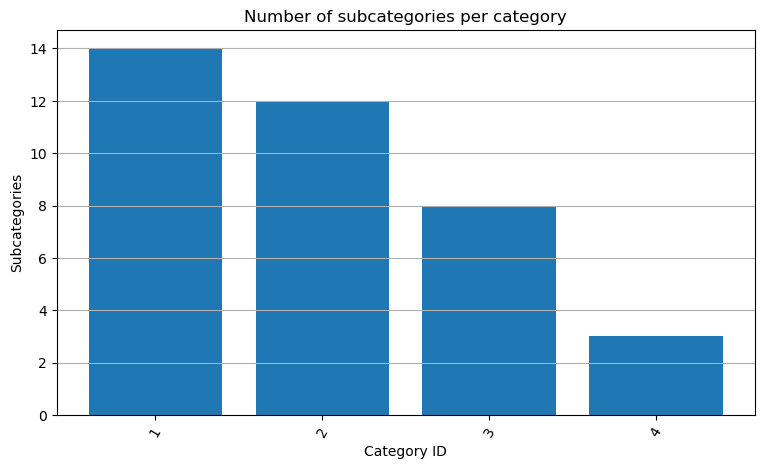

In [8]:
fig, ax = plt.subplots(figsize=(9, 5))
x = [int(k) for k in subcats_in_cat.keys()]
y = [len(v) for v in subcats_in_cat.values()]
y.sort(reverse=True)
ax.bar(x, y)
ax.set_title("Number of subcategories per category")
ax.set_xlabel("Category ID")
ax.set_ylabel("Subcategories")
ax.grid(axis = "y")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(rotation=60)
plt.show()

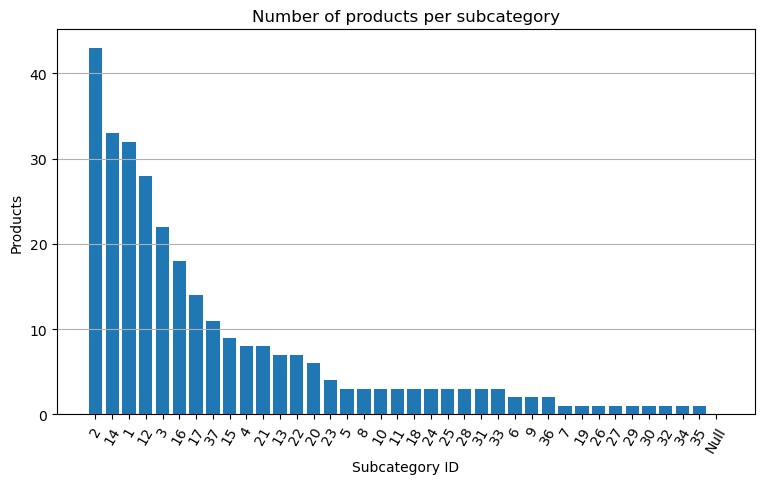

In [9]:
fig, ax = plt.subplots(figsize=(9, 5))
x = list(sorted_orders.keys())
y = list(sorted_orders.values())
ax.bar(x, y)
ax.set_title("Number of products per subcategory")
ax.set_xlabel("Subcategory ID")
ax.set_ylabel("Products")
ax.grid(axis = "y")
plt.xticks(rotation=60)
plt.show()

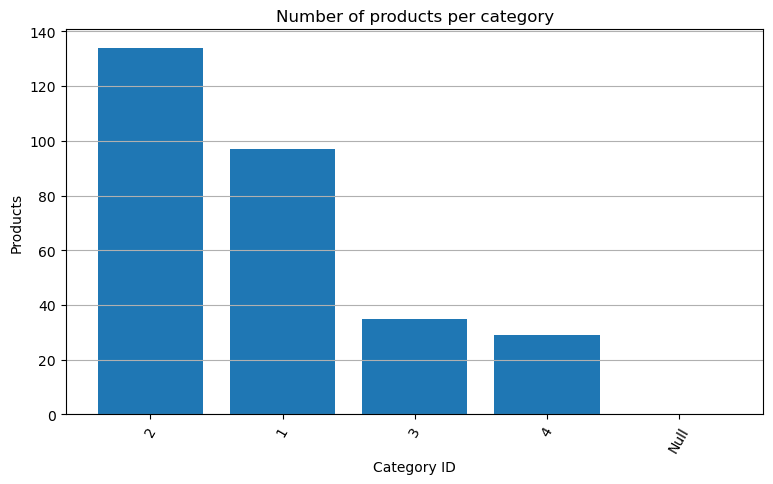

In [10]:
fig, ax = plt.subplots(figsize=(9, 5))
x = list(sorted_products.keys())
y = list(sorted_products.values())
ax.bar(x, y)
ax.set_title("Number of products per category")
ax.set_xlabel("Category ID")
ax.set_ylabel("Products")
ax.grid(axis = "y")
plt.xticks(rotation=60)
plt.show()

# Conclusion Task 1:
From the bar charts above, it is clear that the Null category and Null subcategory has the most products. But since it is Null, it may not be interesting at the moment. If it is disregarded for a while, ProductCategory 2 (Components) takes the lead.

* Category 1 has the most subcategories
* Subcategory 2 has the most products
* Category 2 has the most products in general

Category 4 (Accessories) has the least amount of products according to the charts

# Task 2 - Sales per Product Category
### Makes a dict of unique products for each Category
### Check how many prodcuts each category has and update sorted_orders

In [ ]:
prods_in_cat = {}

# Loops over all ProductCategoryID's and adds it as a key along with all ProductSubcategoryID's as a list for value that has that ProductCategoryID
for i in productCategoryIDs:
    temp_df = product_df.loc[product_df["ProductSubcategoryID"] == i]
    if i not in prods_in_cat:
        prods_in_cat[str(i)] = [_ for _ in temp_df["ProductID"]]

prods_in_cat["Null"] = list(product_df.loc[product_df["ProductSubcategoryID"] == 0.0, "ProductID"].values)

sorted_products["Null"] = len(prods_in_cat["Null"])
sorted_products = dict(sorted(sorted_products.items(), key=lambda item: item[1], reverse=True))

for i in sorted_products:
    print(f"{i}: {sorted_products[i]}")

{'1': [771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993], '2': [749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 973, 974, 975, 976, 977, 997, 998, 999], '3': [953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 978, 979], '4': [808, 809, 810, 811, 812, 813, 946, 947], 'Null': [1, 2, 3, 4, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 

### Place sales in a DataFrame for easy access

In [12]:
# Sales.SalesOrderDetail
sales_query = """
SELECT OrderQty, ProductID, UnitPrice
FROM Sales.SalesOrderDetail
"""

sales_df = query_df(sales_query)

sales_df

,OrderQty,ProductID,UnitPrice
0,1,776,2024.994
1,3,777,2024.994
2,1,778,2024.994
3,1,771,2039.994
4,1,772,2039.994
...,...,...,...
121312,1,878,21.980
121313,1,712,8.990
121314,1,878,21.980
121315,1,879,159.000


### Combine OrderQty and ProductID's. UnitPrice remains the same

In [ ]:
aggs = {"OrderQty" : "sum", "ProductID": "first", "UnitPrice": "first"}

agg_sales_df = sales_df.groupby(sales_df["ProductID"]).aggregate(aggs)

agg_sales_df.head()

,OrderQty,ProductID,UnitPrice
ProductID,,,
707,6266,707,20.1865
708,6532,708,20.1865
709,1107,709,5.7000
710,90,710,5.7000
711,6743,711,20.1865


In [ ]:
sales_prices_df = agg_sales_df.copy()

sales_prices_df["UnitPrice"] *= sales_prices_df["OrderQty"]
sales_prices_df.rename(columns={"UnitPrice": "TotalPrice"}, inplace=True)

sales_prices_df.head()

total_price_per_cat = {}

for i in prods_in_cat:
    total_price_per_cat[i] = 0
    for j in range(len(sales_prices_df["ProductID"])):
        if int(sales_prices_df.iloc[j]["ProductID"]) in prods_in_cat[i]:
            total_price_per_cat[i] += sales_prices_df.iloc[0]["TotalPrice"]

sorted_total_price_per_cat = dict(sorted(total_price_per_cat.items(), key=lambda item: item[1], reverse=False))

{'1': 4047635.4880000018, '2': 5439010.187000004, '3': 2782749.398, '4': 885420.2629999998, 'Null': 0}
{'Null': 0, '4': 885420.2629999998, '3': 2782749.398, '1': 4047635.4880000018, '2': 5439010.187000004}


# Graphs

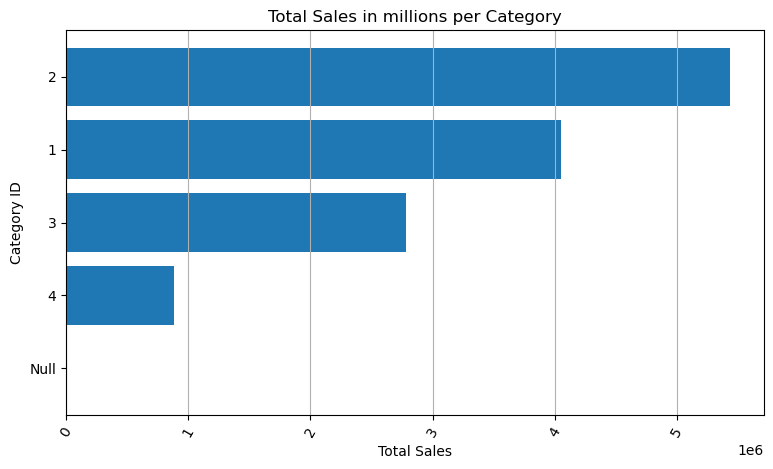

In [183]:
fig, ax = plt.subplots(figsize=(9, 5))
x = list(sorted_total_price_per_cat.keys())
y = list(sorted_total_price_per_cat.values())
ax.barh(x, y)
ax.set_title("Total Sales in millions per Category")
ax.set_xlabel("Total Sales")
ax.set_ylabel("Category ID")
ax.grid(axis = "x")
plt.xticks(rotation=60)
plt.show()